# Cheat sheet for using a mosaic grid with MOM6 output


In [1]:
import netCDF4, numpy, matplotlib.pyplot as plt
%matplotlib inline
plt.xkcd();

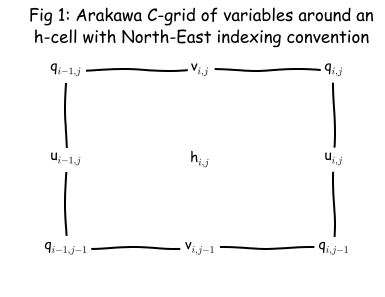

In [2]:
# Figure 1
plt.axis((0,100,0,100)); plt.plot([10,90,90,10,10],[10,10,90,90,10],'k')
text_opts={'horizontalalignment':'center','verticalalignment':'center','backgroundcolor':'w'}
plt.text(50,50,'h$_{i,j}$',text_opts)
plt.text(10,10,'q$_{i-1,j-1}$',text_opts); plt.text(10,90,'q$_{i-1,j}$',text_opts)
plt.text(90,10,'q$_{i,j-1}$',text_opts); plt.text(90,90,'q$_{i,j}$',text_opts)
plt.text(10,50,'u$_{i-1,j}$',text_opts); plt.text(90,50,'u$_{i,j}$',text_opts)
plt.text(50,10,'v$_{i,j-1}$',text_opts); plt.text(50,90,'v$_{i,j}$',text_opts)
plt.axis('off'); plt.title('Fig 1: Arakawa C-grid of variables around an\nh-cell with North-East indexing convention');

## The FMS indexing convention (horizontal indices)

The MOM6 model uses an **Arakawa C-grid** for staggering/locating model variables and a **North-East indexing convention**, illustrated in the Fig. 1 above.
- This indexing concerns the horizontal directions only.
- The North-East convention means that all variables with an `i,j` index are either co-located with, or are placed to the north, east or north-east of, the $h_{i,j}$ point.
- An `h`-point is at the "center" of a continuity cell which governs the budget for mass and tracers. All advected tracers (e.g. potential temperature, salinity, bio-geochemical tracers, ...) are thus co-located with cell thickness, $h$.

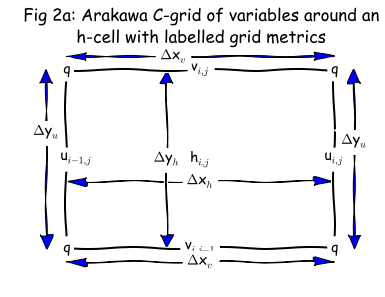

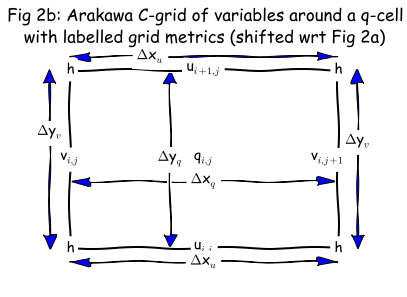

In [3]:
# Figure 2
plt.axis((0,100,0,100)); plt.plot([10,90,90,10,10],[10,10,90,90,10],'k')
text_opts={'horizontalalignment':'center','verticalalignment':'center','backgroundcolor':'w'}
plt.text(50,50,'h$_{i,j}$',text_opts)
plt.text(10,10,'q',text_opts); plt.text(10,90,'q',text_opts)
plt.text(90,10,'q',text_opts); plt.text(90,90,'q',text_opts)
plt.text(13,50,'u$_{i-1,j}$',text_opts); plt.text(90,50,'u$_{i,j}$',text_opts)
plt.text(50,10,'v$_{i,j-1}$',text_opts); plt.text(50,90,'v$_{i,j}$',text_opts)
def myarrow(x1,x2,y1,y2,lab,a=0.5):
    b=1-a; plt.arrow(a*x1+b*x2,a*y1+b*y2,x2-a*x1-b*x2,y2-a*y1-b*y2,length_includes_head=True,head_width=4)
    plt.arrow(a*x1+b*x2,a*y1+b*y2,x1-a*x1-b*x2,y1-a*y1-b*y2,length_includes_head=True,head_width=4)
    plt.text(a*x1+b*x2,a*y1+b*y2,lab,text_opts)
myarrow(10,90,40,40,'$\Delta$x$_h$'); myarrow(40,40,10,90,'$\Delta$y$_h$')
myarrow(4,4,10,90,'$\Delta$y$_u$',a=.35); myarrow(96,96,10,90,'$\Delta$y$_u$',a=.4)
myarrow(10,90,4,4,'$\Delta$x$_v$'); myarrow(10,90,96,96,'$\Delta$x$_v$',a=.6)
plt.axis('off'); plt.title('Fig 2a: Arakawa C-grid of variables around an\nh-cell with labelled grid metrics');
plt.figure()
plt.axis((0,100,0,100)); plt.plot([10,90,90,10,10],[10,10,90,90,10],'k')
text_opts={'horizontalalignment':'center','verticalalignment':'center','backgroundcolor':'w'}
plt.text(50,50,'q$_{i,j}$',text_opts)
plt.text(10,10,'h',text_opts); plt.text(10,90,'h',text_opts)
plt.text(90,10,'h',text_opts); plt.text(90,90,'h',text_opts)
plt.text(10,50,'v$_{i,j}$',text_opts); plt.text(87,50,'v$_{i,j+1}$',text_opts)
plt.text(50,10,'u$_{i,j}$',text_opts); plt.text(50,90,'u$_{i+1,j}$',text_opts)
plt.axis('off'); plt.title('Fig 2b: Arakawa C-grid of variables around a q-cell\nwith labelled grid metrics (shifted wrt Fig 2a)');
myarrow(10,90,40,40,'$\Delta$x$_q$'); myarrow(40,40,10,90,'$\Delta$y$_q$')
myarrow(4,4,10,90,'$\Delta$y$_v$',a=.35); myarrow(96,96,10,90,'$\Delta$y$_v$',a=.4)
myarrow(10,90,4,4,'$\Delta$x$_u$'); myarrow(10,90,96,96,'$\Delta$x$_u$',a=.7)

The model, and analyses of model output, often require grid metrics that depend on locations within the staggered grid:
- Distance between the a variables location, e.g. distance between u-points, between v-points, ...;
- Area of cell centered on a variable, e.g. h-cell area which is that bounded by the q-points.

The eight most widely used distances are shown in Fig. 2a and 2b. Note that Fig. 2b is shifted a half-cell diagnonally with respect to Fig. 2a.

> ### Comment on why we use Mosaics
> Defining all of these metrics at each location led to the old grid-specification having numerous variables, with possibly ambiguous names, that meant subtlely different things, e.g. dx_u might have been the distance between u-points, which on a regular spherical grid would contain similar values to dx_h, the distance between h-points. In these old specification it was very easy to use the wrong variable just due to naming conventions. Further, naming metrics by variable location depends on whether a grid specificatino is to be used for a C-grid or a B-grid.

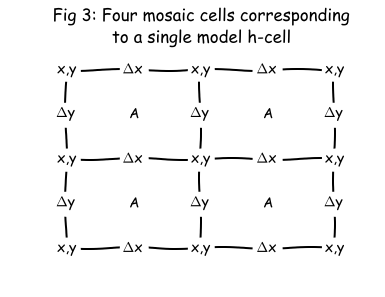

In [4]:
# Figure 3
nan = numpy.nan
plt.axis((0,100,0,100)); plt.plot([10,90,90,10,10,nan,10,90,nan,50,50],[10,10,90,90,10,nan,50,50,nan,10,90],'k')
text_opts={'horizontalalignment':'center','verticalalignment':'center','backgroundcolor':'w'}
for y in [10,50,90]:
    for x in [10,50,90]:
        plt.text(x,y,'x,y',text_opts)
    for x in [30,70]:
        plt.text(x,y,'$\Delta$x',text_opts)
for y in [30,70]:
    for x in [10,50,90]:
        plt.text(x,y,'$\Delta$y',text_opts)
    for x in [30,70]:
        plt.text(x,y,'A',text_opts)
plt.axis('off'); plt.title('Fig 3: Four mosaic cells corresponding\nto a single model h-cell');

## Mosaic grid specification

A mosaic grid specification makes use of a "supergrid" which is a simple grid which is an integer refinement of the target model grid. The grid specification provides the bare minimum metrics for the supergrid cells which can be combined by aggregation to obtain the appropriate metrics for the model grid. A logically rectangular grid (LRG) mosaic specification will contain
- `ni` - Number of columns in x-direction
- `nj` - Number of rows in y-direction
- `x[nj+1,ni+1]` - x-coordinate of the grid vertices
- `y[nj+1,ni+1]` - y-coordinate of the grid vertices
- `area[nj,ni]` - area of each cell
- `dx[nj+1,ni]` - length of the edges of constant j-index
- `dy[nj,ni+1]` - length of the edges of constant -index

Fig. 3 shows a super grid which overlays the model grid in Figs 1 and 2a with a refinement factor of 2. For orthogonal grids, we can see that the quantities in Fig. 2a can be found by summing pairs of quantities in Fig. 3.

Notes:
- The data has different shapes depending on location which means that an indexing convention is not needed.
- The is no redundant data, except:
  - For an x-periodic domain, the `x,y` and $\Delta y$ data along the left and right edges should be identical data.
  - Similar for a y-periodic domain (unusual in global models), the `x,y` and $\Delta x$ data along the top and bottom edges should be identical data.

### Mosaic index relationship to model index

The refined resolution of a mosaic with respect to a model grid means one needs to calculate relative indices. Using a **python** index convention that starts at 0, netcdf index-order (j,i) and assuming a refinement factor of 2:

- The `x,y` location of `h[j,i]` is at `x[2j+1,2i+1],y[2j+1,2i+1]`
  - so that `h[0,0]` is at `x[1,1],y[1,1]`,  `h[0,1]` is at `x[1,3],y[1,3]`, etc.
- The `x,y` location of `q[j,i]` is at `x[2j,2i],y[2j,2i]`
  - so that `q[0,0]` is at `x[0,0],y[0,0]`,  `q[0,1]` is at `x[0,2],y[0,2]`, etc.
- The `x,y` location of `u[j,i]` is at `x[2j+1,2i],y[2j+1,2i]`
  - so that `u[0,0]` is at `x[1,0],y[1,0]`,  `u[0,1]` is at `x[1,2],y[1,2]`, etc.
- The `x,y` location of `v[j,i]` is at `x[2j,2i+1],y[2j,2i+1]`
  - so that `v[0,0]` is at `x[0,1],y[0,1]`,  `v[0,1]` is at `x[0,3],y[0,3]`, etc.
- The distance between u-points, centered at `h[j,i]` is `dxh[j,i] = dx[2j+1,2i] + dx[2j+1,2i+1]`
- The distance between v-points, centered at `h[j,i]` is `dxh[j,i] = dy[2j,2i+1] + dy[2j+1,2i+1]`
- The distance between q-points, centered at `v[j,i]` is `dxCv[j,i] = dx[2j,2i] + dx[2j,2i+1]`
- The distance between q-points, centered at `u[j,i]` is `dyCu[j,i] = dy[2j,2i] + dy[2j+1,2i]`
- The distance between h-points, centered at `u[j,i]` is `dxCu[j,i] = dx[2j+1,2i-1] + dx[2j+1,2i]`
  - (note periodic wrapping of i-index is needed)
- The distance between h-points, centered at `v[j,i]` is `dyCv[j,i] = dy[2j-1,2i+1] + dx[2j,2i+1]`
  - (note periodic wrapping of j-index is needed)
- The distance between v-points, centered at `q[j,i]` is `dxBu[j,i] = dx[2j,2i-1] + dx[2j,2i]`
  - (note periodic wrapping of i-index is needed)
- The distance between u-points, centered at `q[j,i]` is `dyBu[j,i] = dy[2j-1,2i] + dx[2j,2i]`
  - (note periodic wrapping of j-index is needed)
- The area of an h-cell, centered at `h[j,i]` is `areah[j,i] = area[2j,2i] + area[2j,2i+1] + area[2j+1,2i] + area[2j+1,2i+1]`
- The area of a q-cell, centered at `q[j,i]` is `areaBu[j,i] = area[2j-1,2i-1] + area[2j-1,2i] + area[2j,2i-1] + area[2j,2i]`
  - (note periodic wrapping of i- and j-index is needed)
- The area of a u-cell, centered at `u[j,i]` is `areaCu[j,i] = area[2j,2i-1] + area[2j,2i] + area[2j+1,2i-1] + area[2j+1,2i]`
  - (note periodic wrapping of i-index is needed)
- The area of a v-cell, centered at `v[j,i]` is `areaCv[j,i] = area[2j-1,2i] + area[2j-1,2i+1] + area[2j,2i] + area[2j,2i+1]`
  - (note periodic wrapping of j-index is needed)

In [5]:
# For the OM4_025 grid (CM4 ocean component)
path_to_mosaic_dir = '/archive/gold/datasets/OM4_025/mosaic.v20140610.unpacked/'

# T point locations
xt = netCDF4.Dataset(path_to_mosaic_dir+'/ocean_hgrid.nc').variables['x'][1::2,1::2]
yt = netCDF4.Dataset(path_to_mosaic_dir+'/ocean_hgrid.nc').variables['y'][1::2,1::2]

# Corner point locations
xq = netCDF4.Dataset(path_to_mosaic_dir+'/ocean_hgrid.nc').variables['x'][::2,::2]
yq = netCDF4.Dataset(path_to_mosaic_dir+'/ocean_hgrid.nc').variables['y'][::2,::2]

# U point locations
xu = netCDF4.Dataset(path_to_mosaic_dir+'/ocean_hgrid.nc').variables['x'][1::2,::2]
yu= netCDF4.Dataset(path_to_mosaic_dir+'/ocean_hgrid.nc').variables['y'][1::2,::2]

# V point locations
xv = netCDF4.Dataset(path_to_mosaic_dir+'/ocean_hgrid.nc').variables['x'][::2,1::2]
yv= netCDF4.Dataset(path_to_mosaic_dir+'/ocean_hgrid.nc').variables['y'][::2,1::2]

# Wet/dry mask
wet = netCDF4.Dataset(path_to_mosaic_dir+'/ocean_mask.nc').variables['mask'][:,:]

# Super grid data
area = netCDF4.Dataset(path_to_mosaic_dir+'/ocean_hgrid.nc').variables['area'][:,:]
dx = netCDF4.Dataset(path_to_mosaic_dir+'/ocean_hgrid.nc').variables['dx'][:,:]
dy = netCDF4.Dataset(path_to_mosaic_dir+'/ocean_hgrid.nc').variables['dy'][:,:]

# T cell area (sum of four supergrid cells)
areat = ( ( area[::2,::2] + area[1::2,1::2] ) + ( area[::2,1::2] + area[::2,1::2] ) )*wet

# x-distance between U points
dxh = dx[1::2,::2] + dx[1::2,1::2]

# x-distance between corner points
dxCv = dx[2::2,::2] + dx[2::2,1::2]

# x-distance between T points
dxCu = dx[1::2,::2]
dxCu = dxCu + numpy.roll( dx[1::2,:-1:2], -1, axis=-1 )

# x-distance between V points
dxBu = dx[2::2,1::2]
dxBu = dxBu + numpy.roll( dx[2::2,::2], -1, axis=-1 )

In [6]:
whos

Variable             Type        Data/Info
------------------------------------------
area                 ndarray     2160x2880: 6220800 elems, type `float64`, 49766400 bytes (47.4609375 Mb)
areat                ndarray     1080x1440: 1555200 elems, type `float64`, 12441600 bytes (11.865234375 Mb)
dx                   ndarray     2161x2880: 6223680 elems, type `float64`, 49789440 bytes (47.48291015625 Mb)
dxBu                 ndarray     1080x1440: 1555200 elems, type `float64`, 12441600 bytes (11.865234375 Mb)
dxCu                 ndarray     1080x1440: 1555200 elems, type `float64`, 12441600 bytes (11.865234375 Mb)
dxCv                 ndarray     1080x1440: 1555200 elems, type `float64`, 12441600 bytes (11.865234375 Mb)
dxh                  ndarray     1080x1440: 1555200 elems, type `float64`, 12441600 bytes (11.865234375 Mb)
dy                   ndarray     2160x2881: 6222960 elems, type `float64`, 49783680 bytes (47.4774169921875 Mb)
myarrow              function    <function mya